In [1]:
%pip install lightgbm
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

Note: you may need to restart the kernel to use updated packages.


In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [4]:
train_df.sample(5)

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
3367    3368       2309     145     26                               342   
1365    1366       3047      78     15                               170   
11983  11984       3361     298     11                               459   
4807    4808       2188     339     27                                67   
6811    6812       2811     203     25                               256   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
3367                               15                             1040   
1365                                0                             3480   
11983                              21                             3274   
4807                               36                              750   
6811                              128                             1154   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
3367             245             225             91   
1365             238             211             99   
11983            188             236            188   
4807             153             191            170   
6811             199             253            176   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
3367                                  573                 0                 0   
1365                                  277                 1                 0   
11983                                1716                 1                 0   
4807                                 1020                 0                 0   
6811                                 1766                 0                 0   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
3367                  0                 1           0           0           1   
1365                  0                 0           0           0           0   
11983                 0                 0           0           0           0   
4807                  0                 1           0           0           0   
6811                  1                 0           0           0           0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
3367            0           0           0           0           0           0   
1365            0           0           0           0           0           0   
11983           0           0           0           0           0           0   
4807            0           0           0           0           0           0   
6811            1           0           0           0           0           0   

       Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
3367             0            0            0            0            0   
1365             0            0            0            0            0   
11983            0            0            0            0            0   
4807             1            0            0            0            0   
6811             0            0            0            0            0   

       Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
3367             0            0            0            0            0   
1365             0            0            0            0            0   
11983            0            0            0            0            0   
4807             0            0            0            0            0   
6811             0            0            0            0            0   

       Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
3367             0            0            0            0            0   
1365             0            0            0            0            0   
11983            0            0            0            0            0   
4807             0            0            0            0            0   
6811             0            0            0            

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [6]:
for column in train_df.columns:
    train_df[column] = train_df[column].astype("int32")

In [7]:
train_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [8]:
train_df.describe().T

count         mean          std     min  \
Id                                  15120.0  7560.500000  4364.912370     1.0   
Elevation                           15120.0  2749.322553   417.678187  1863.0   
Aspect                              15120.0   156.676653   110.085801     0.0   
Slope                               15120.0    16.501587     8.453927     0.0   
Horizontal_Distance_To_Hydrology    15120.0   227.195701   210.075296     0.0   
Vertical_Distance_To_Hydrology      15120.0    51.076521    61.239406  -146.0   
Horizontal_Distance_To_Roadways     15120.0  1714.023214  1325.066358     0.0   
Hillshade_9am                       15120.0   212.704299    30.561287     0.0   
Hillshade_Noon                      15120.0   218.965608    22.801966    99.0   
Hillshade_3pm                       15120.0   135.091997    45.895189     0.0   
Horizontal_Distance_To_Fire_Points  15120.0  1511.147288  1099.936493     0.0   
Wilderness_Area1                    15120.0     0.237897     0.425810     0.0   
Wilderness_Area2                    15120.0     0.033003     0.178649     0.0   
Wilderness_Area3                    15120.0     0.419907     0.493560     0.0   
Wilderness_Area4                    15120.0     0.309193     0.462176     0.0   
Soil_Type1                          15120.0     0.023479     0.151424     0.0   
Soil_Type2                          15120.0     0.041204     0.198768     0.0   
Soil_Type3                          15120.0     0.063624     0.244091     0.0   
Soil_Type4                          15120.0     0.055754     0.229454     0.0   
Soil_Type5                          15120.0     0.010913     0.103896     0.0   
Soil_Type6                          15120.0     0.042989     0.202840     0.0   
Soil_Type7                          15120.0     0.000000     0.000000     0.0   
Soil_Type8                          15120.0     0.000066     0.008133     0.0   
Soil_Type9                          15120.0     0.000661     0.025710     0.0   
Soil_Type10                         15120.0     0.141667     0.348719     0.0   
Soil_Type11                         15120.0     0.026852     0.161656     0.0   
Soil_Type12                         15120.0     0.015013     0.121609     0.0   
Soil_Type13                         15120.0     0.031481     0.174621     0.0   
Soil_Type14                         15120.0     0.011177     0.105133     0.0   
Soil_Type15                         15120.0     0.000000     0.000000     0.0   
Soil_Type16                         15120.0     0.007540     0.086506     0.0   
Soil_Type17                         15120.0     0.040476     0.197080     0.0   
Soil_Type18                         15120.0     0.003968     0.062871     0.0   
Soil_Type19                         15120.0     0.003042     0.055075     0.0   
Soil_Type20                         15120.0     0.009193     0.095442     0.0   
Soil_Type21                         15120.0     0.001058     0.032514     0.0   
Soil_Type22                         15120.0     0.022817     0.149326     0.0   
Soil_Type23                         15120.0     0.050066     0.218089     0.0   
Soil_Type24                         15120.0     0.016997     0.129265     0.0   
Soil_Type25                         15120.0     0.000066     0.008133     0.0   
Soil_Type26                         15120.0     0.003571     0.059657     0.0   
Soil_Type27                         15120.0     0.000992     0.031482     0.0   
Soil_Type28                         15120.0     0.000595     0.024391     0.0   
Soil_Type29                         15120.0     0.085384     0.279461     0.0   
Soil_Type30                         15120.0     0.047950     0.213667     0.0   
Soil_Type31                         15120.0     0.021958     0.146550     0.0   
Soil_Type32                         15120.0     0.045635     0.208699     0.0   
Soil_Type33                         15120.0     0.040741     0.197696     0.0   
Soil_Type34                         15120.0     0.001455     0.038118

In [9]:
train_df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [10]:
train_df["Cover_Type"].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

In [11]:
for column in train_df.columns:
    print(f"{column} has unique values ({train_df[column].nunique()})")

Id has unique values (15120)
Elevation has unique values (1665)
Aspect has unique values (361)
Slope has unique values (52)
Horizontal_Distance_To_Hydrology has unique values (400)
Vertical_Distance_To_Hydrology has unique values (423)
Horizontal_Distance_To_Roadways has unique values (3250)
Hillshade_9am has unique values (176)
Hillshade_Noon has unique values (141)
Hillshade_3pm has unique values (247)
Horizontal_Distance_To_Fire_Points has unique values (2710)
Wilderness_Area1 has unique values (2)
Wilderness_Area2 has unique values (2)
Wilderness_Area3 has unique values (2)
Wilderness_Area4 has unique values (2)
Soil_Type1 has unique values (2)
Soil_Type2 has unique values (2)
Soil_Type3 has unique values (2)
Soil_Type4 has unique values (2)
Soil_Type5 has unique values (2)
Soil_Type6 has unique values (2)
Soil_Type7 has unique values (1)
Soil_Type8 has unique values (2)
Soil_Type9 has unique values (2)
Soil_Type10 has unique values (2)
Soil_Type11 has unique values (2)
Soil_Type12

In [12]:
train_df.drop(["Soil_Type7","Soil_Type15"],axis=1,inplace=True)

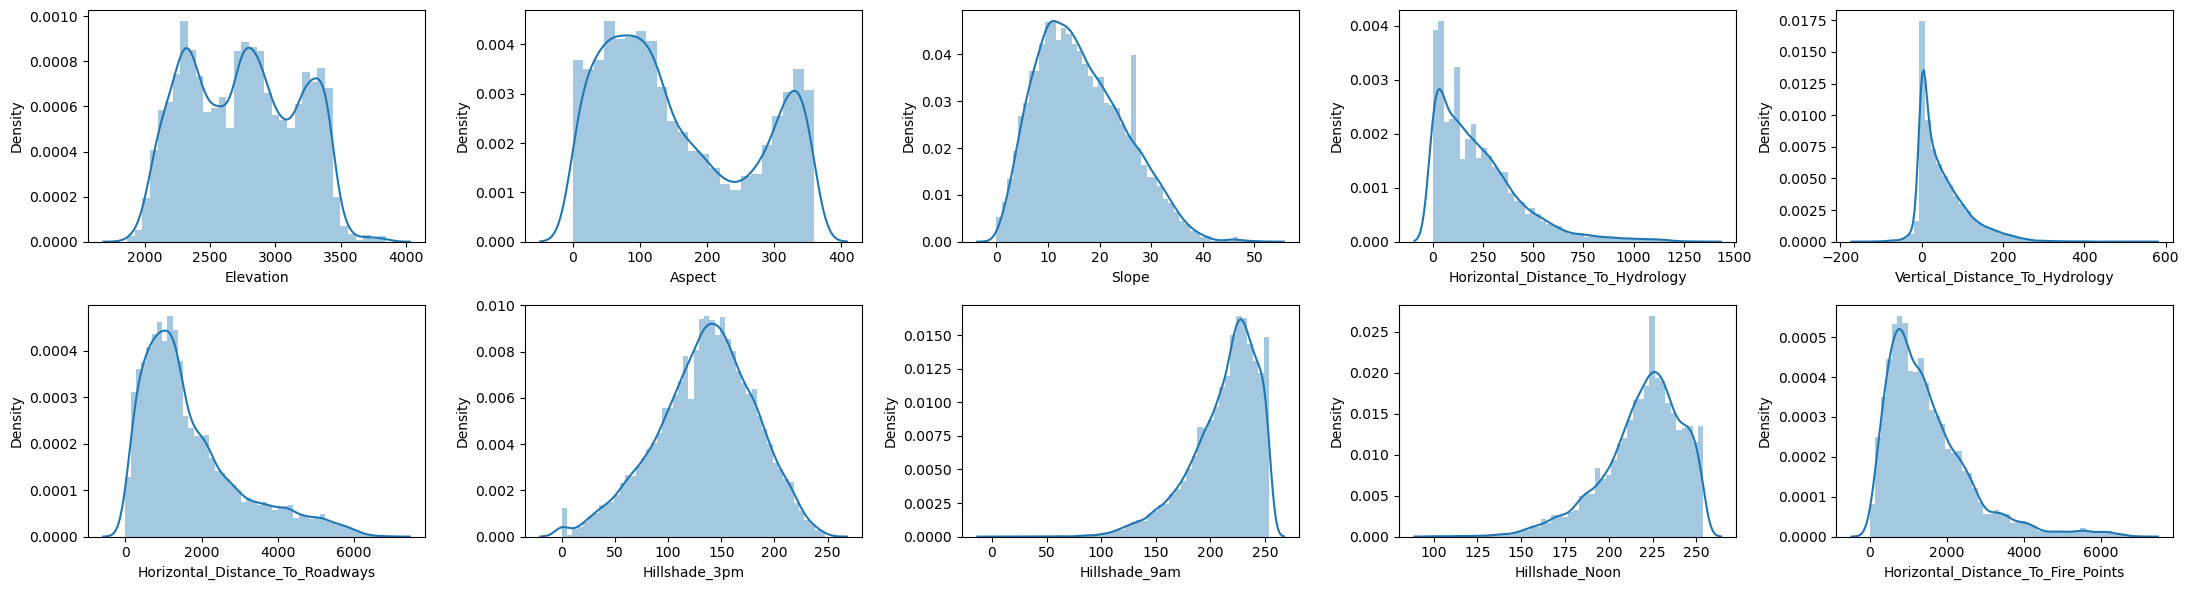

In [13]:
fig , ax = plt.subplots(2,5,figsize = (22,6))
df_hist = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
ax1 = sns.distplot(x=df_hist["Elevation"],ax=ax[0,0])
ax1.set_xlabel("Elevation")
ax2 = sns.distplot(x=df_hist["Aspect"],ax=ax[0,1])
ax2.set_xlabel("Aspect")
ax3 = sns.distplot(x=df_hist["Slope"],ax=ax[0,2])
ax3.set_xlabel("Slope")
ax4 = sns.distplot(x=df_hist["Horizontal_Distance_To_Hydrology"],ax=ax[0,3])
ax4.set_xlabel("Horizontal_Distance_To_Hydrology")
ax5 = sns.distplot(x=df_hist["Vertical_Distance_To_Hydrology"],ax=ax[0,4])
ax5.set_xlabel("Vertical_Distance_To_Hydrology")
ax6 = sns.distplot(x=df_hist["Horizontal_Distance_To_Roadways"],ax=ax[1,0])
ax6.set_xlabel("Horizontal_Distance_To_Roadways")
ax7 = sns.distplot(x=df_hist["Hillshade_3pm"],ax=ax[1,1])
ax7.set_xlabel("Hillshade_3pm")
ax8 = sns.distplot(x=df_hist["Hillshade_9am"],ax=ax[1,2])
ax8.set_xlabel("Hillshade_9am")
ax9 = sns.distplot(x=df_hist["Hillshade_Noon"],ax=ax[1,3])
ax9.set_xlabel("Hillshade_Noon")
ax10 = sns.distplot(x=df_hist["Horizontal_Distance_To_Fire_Points"],ax=ax[1,4])
ax10.set_xlabel("Horizontal_Distance_To_Fire_Points")
plt.tight_layout()
plt.show()

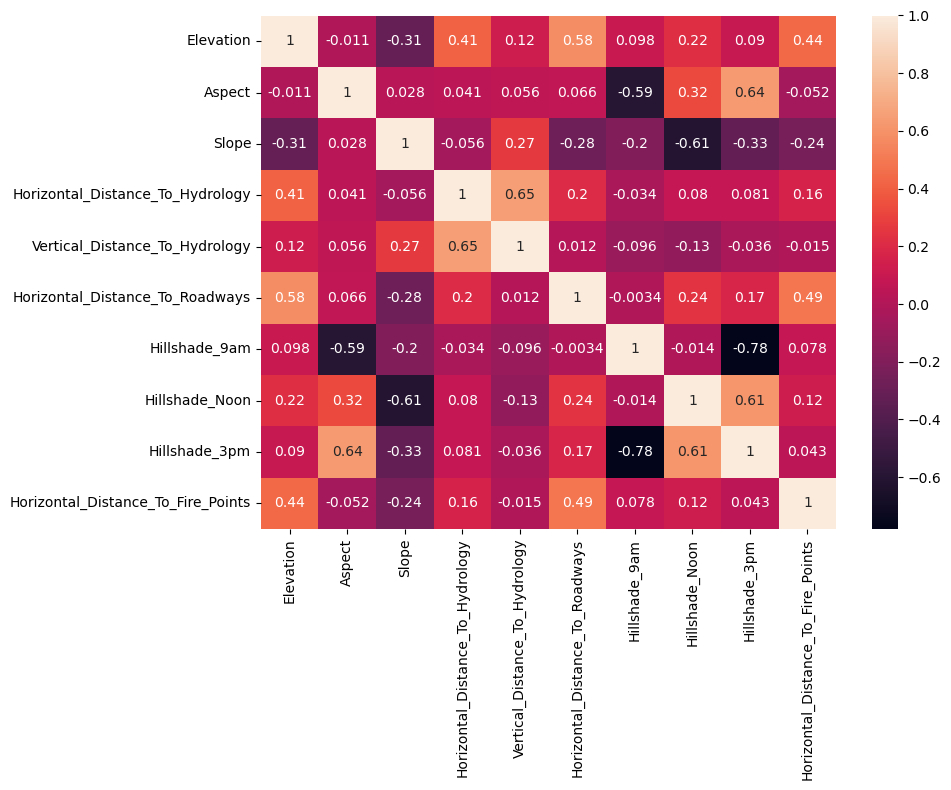

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hist.corr(),annot=True)
plt.tight_layout()
plt.show()

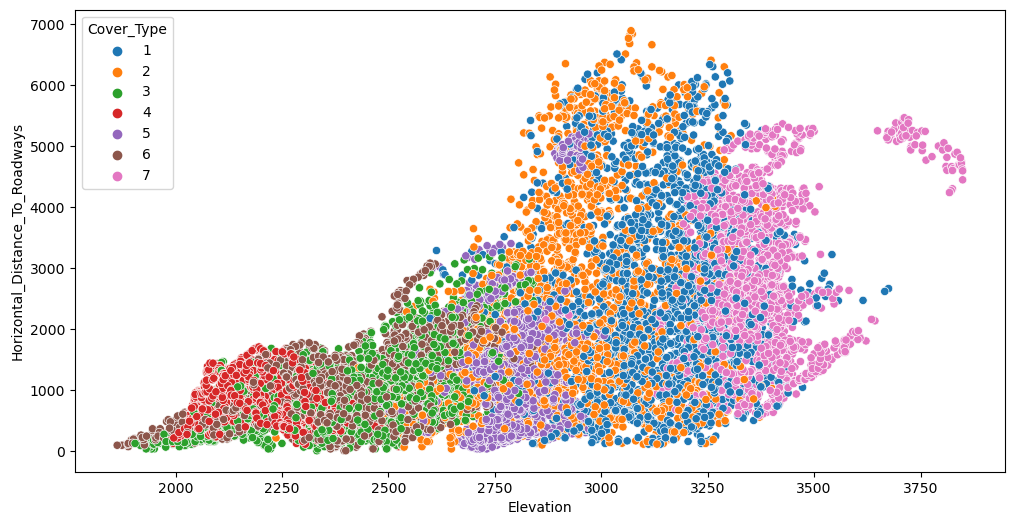

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Elevation"],y=train_df["Horizontal_Distance_To_Roadways"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

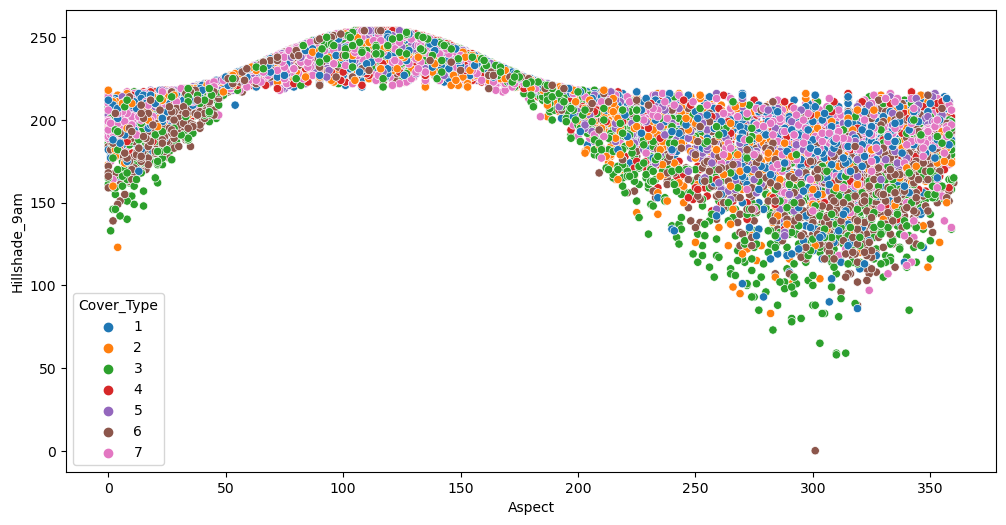

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Aspect"],y=train_df["Hillshade_9am"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

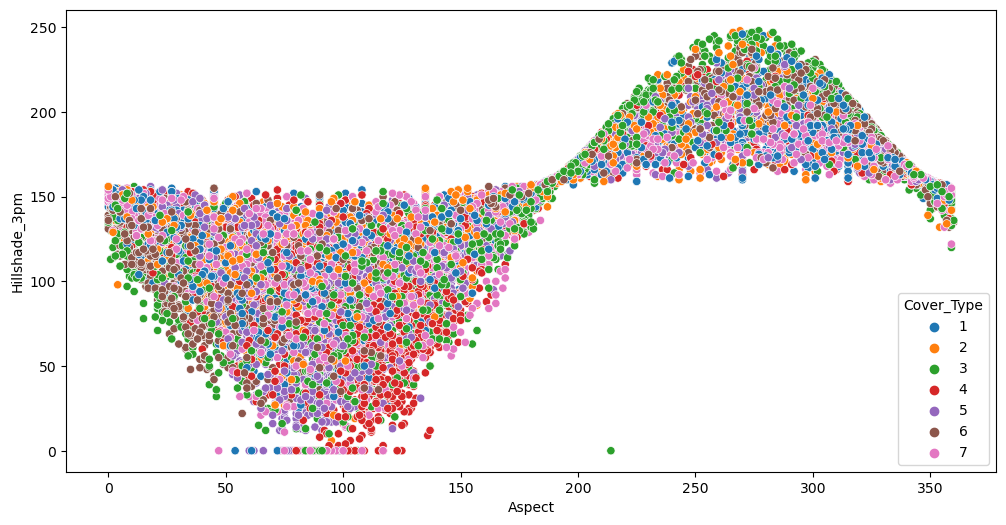

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Aspect"],y=train_df["Hillshade_3pm"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

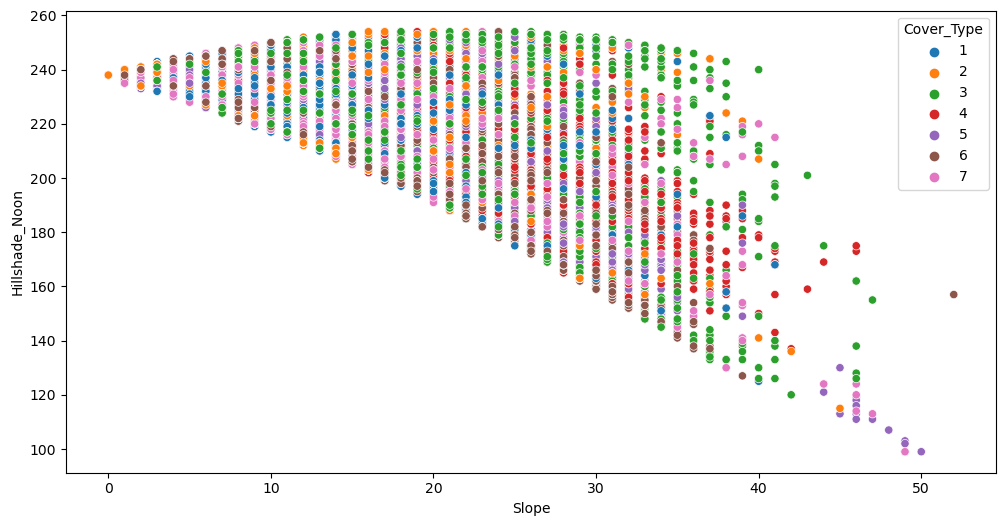

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Slope"],y=train_df["Hillshade_Noon"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

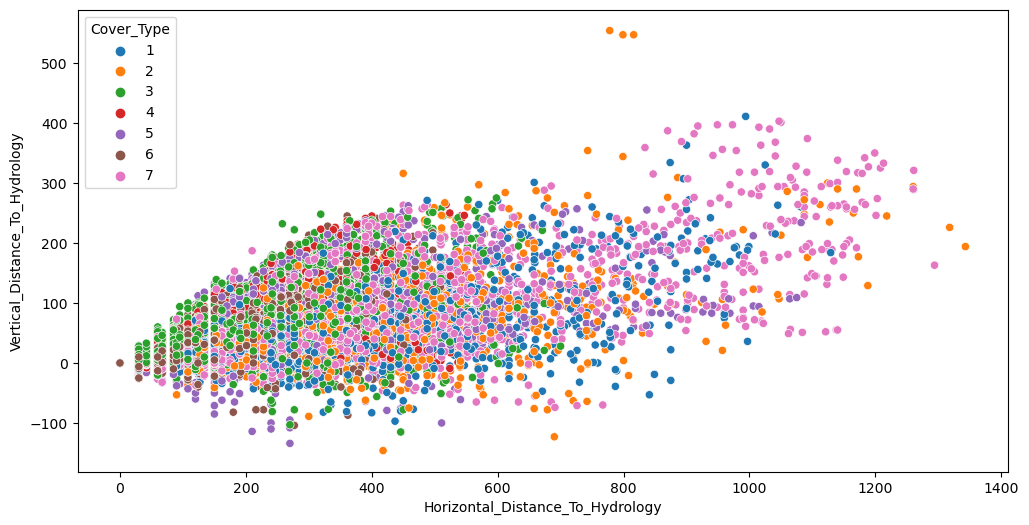

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Horizontal_Distance_To_Hydrology"],y=train_df["Vertical_Distance_To_Hydrology"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

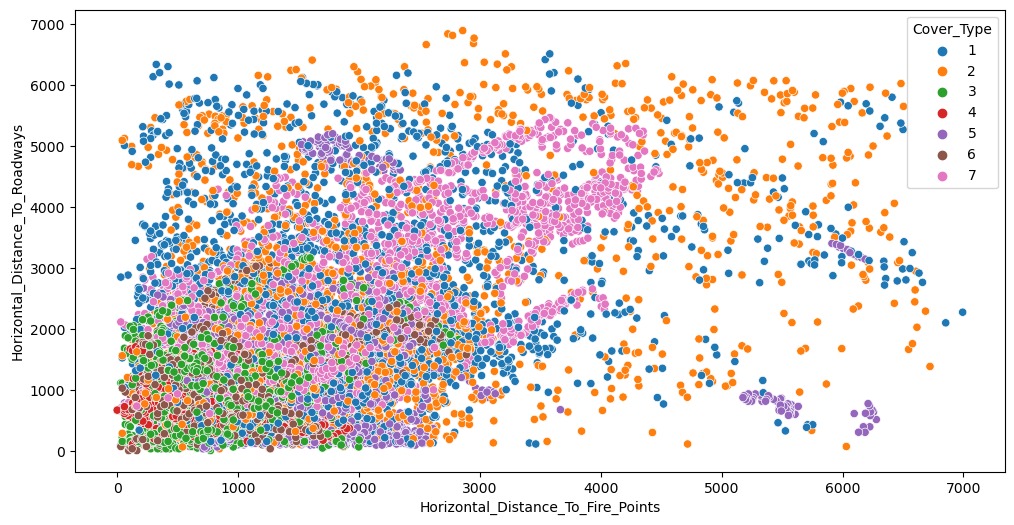

<Figure size 640x480 with 0 Axes>

In [20]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Horizontal_Distance_To_Fire_Points"],y=train_df["Horizontal_Distance_To_Roadways"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

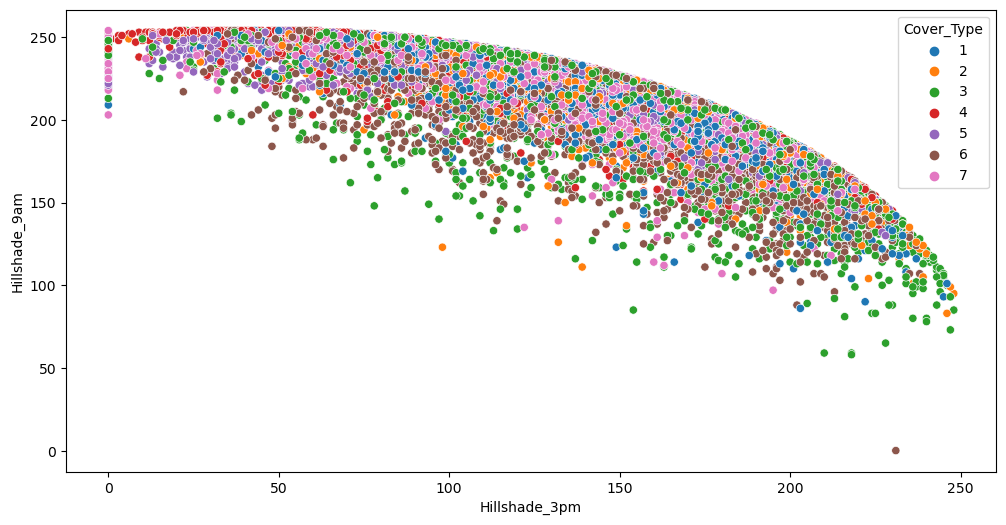

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Hillshade_3pm"],y=train_df["Hillshade_9am"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

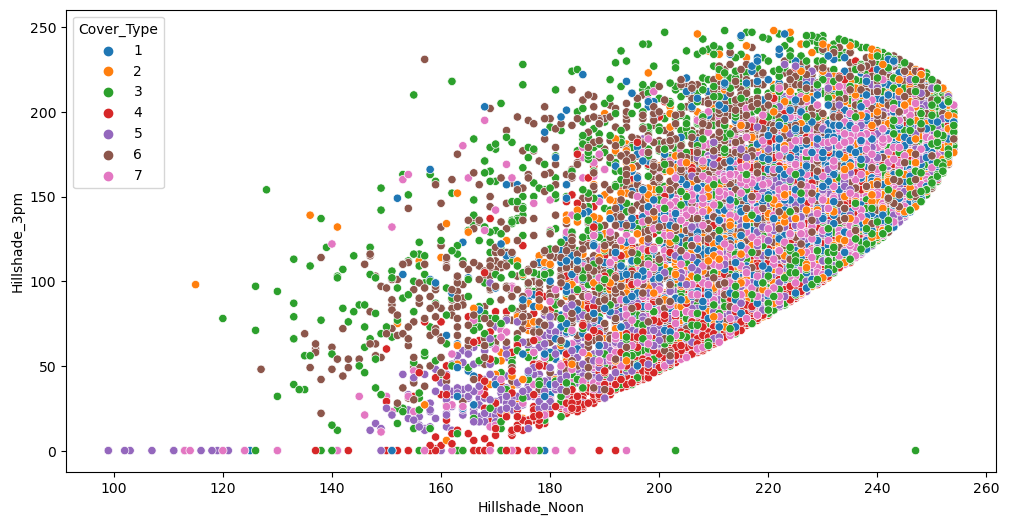

<Figure size 640x480 with 0 Axes>

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Hillshade_Noon"],y=train_df["Hillshade_3pm"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

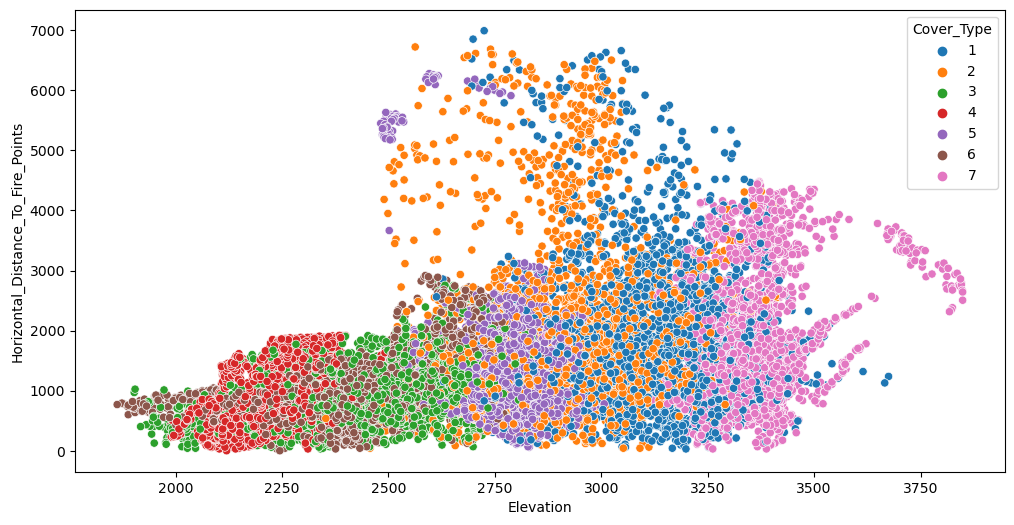

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=train_df["Elevation"],y=train_df["Horizontal_Distance_To_Fire_Points"],hue=train_df["Cover_Type"],palette="tab10")
plt.show()
plt.tight_layout()

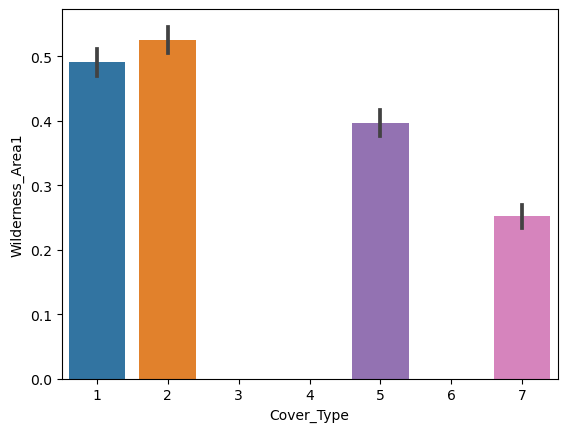

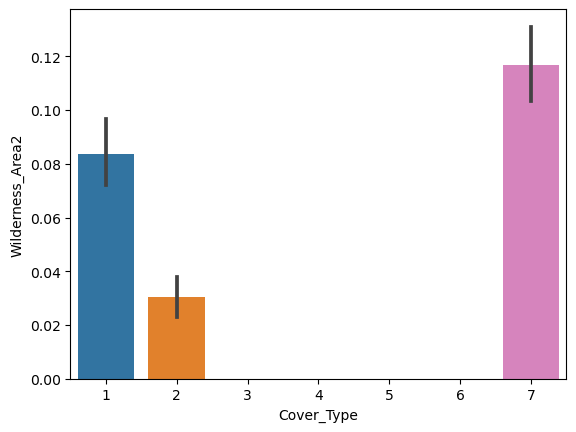

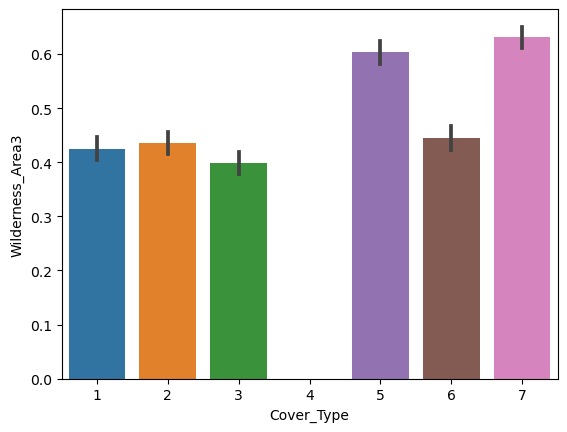

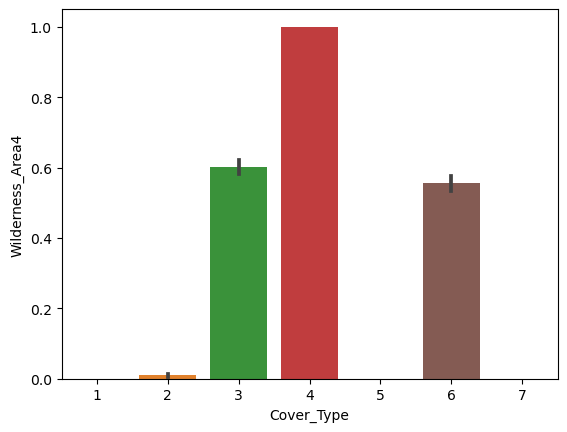

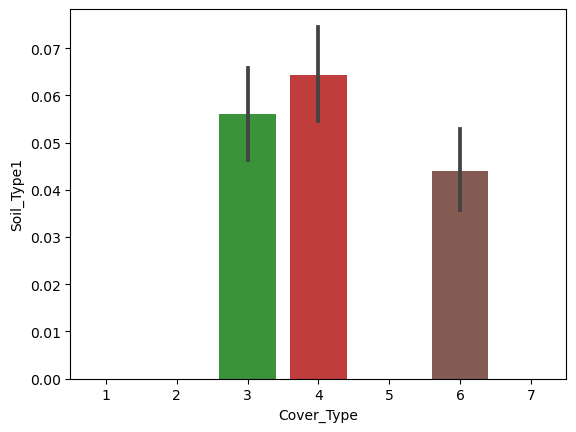

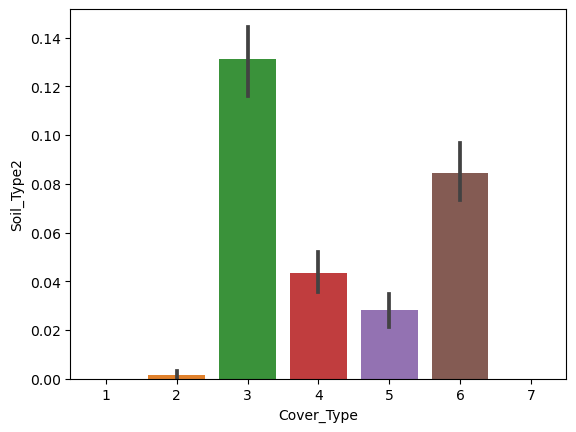

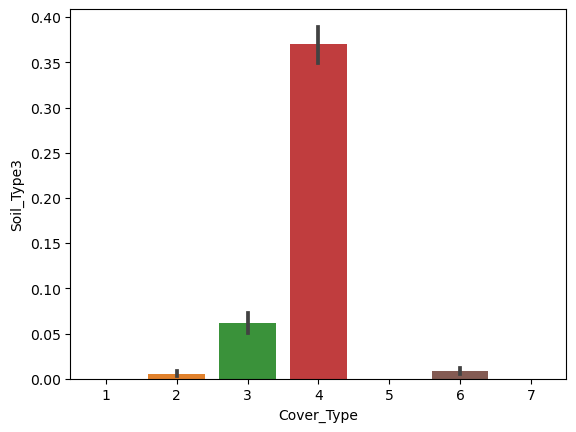

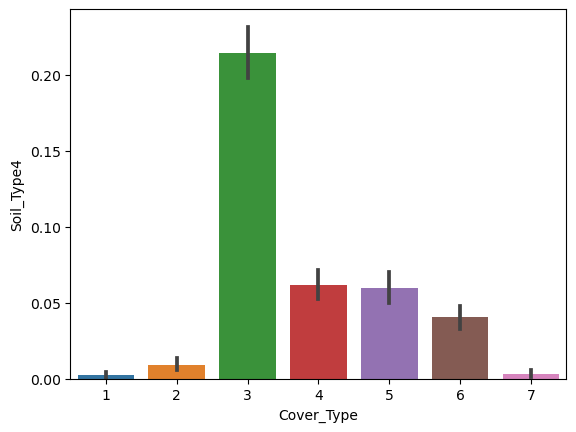

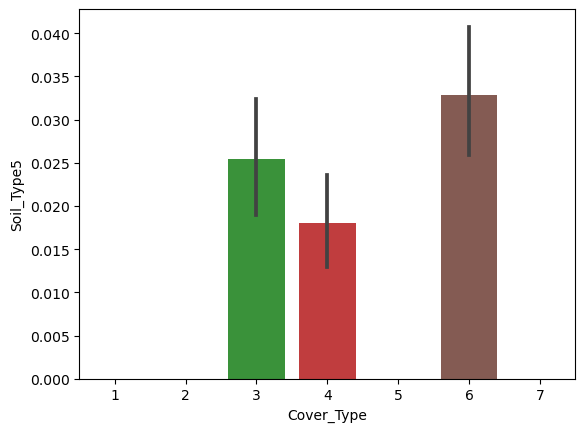

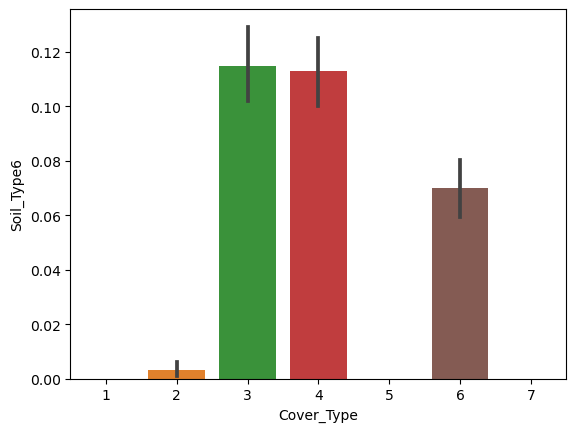

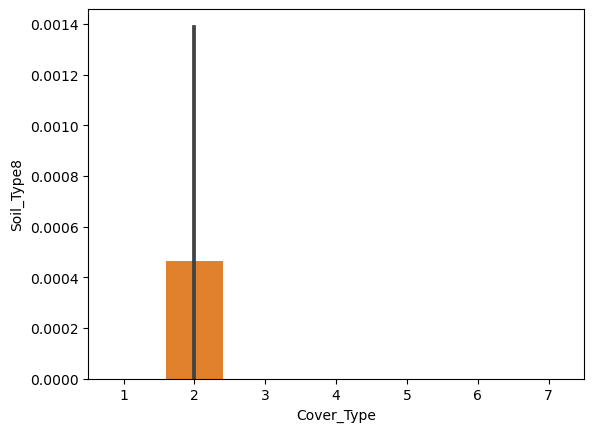

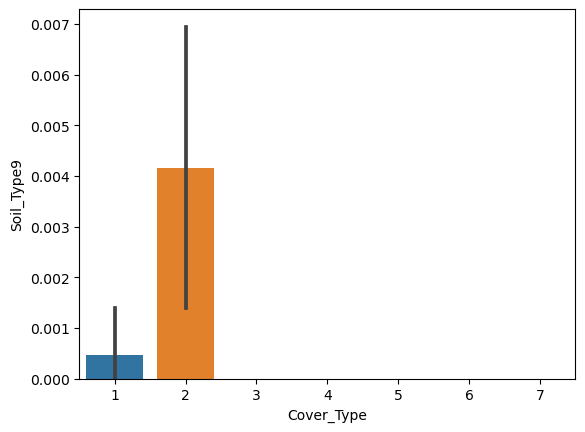

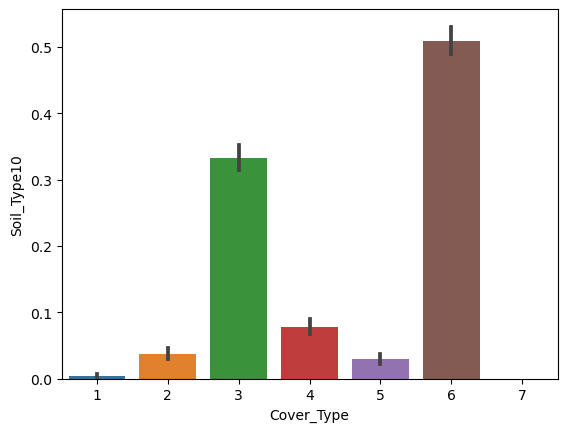

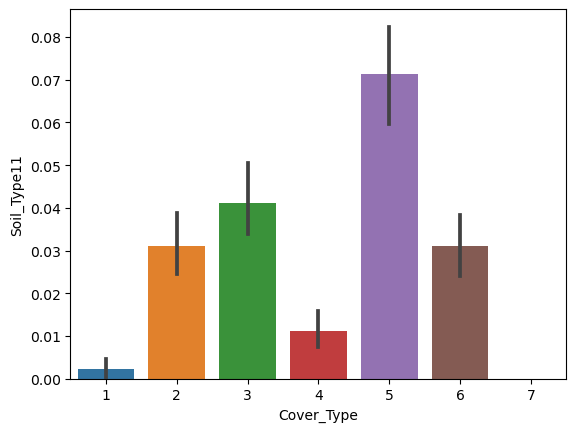

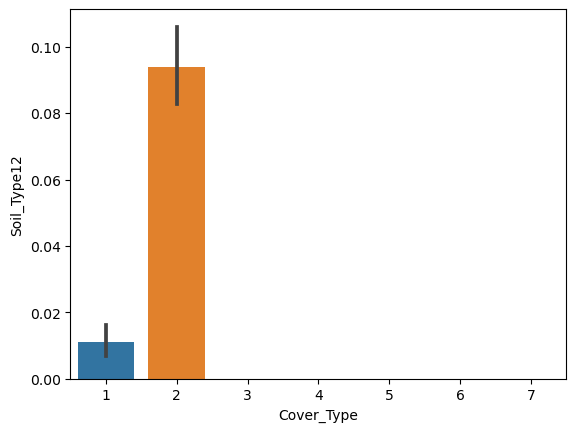

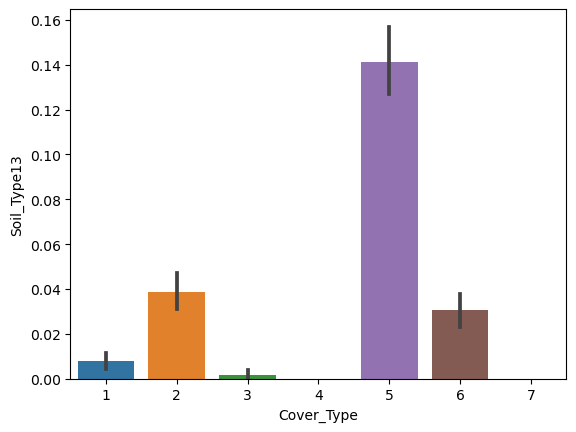

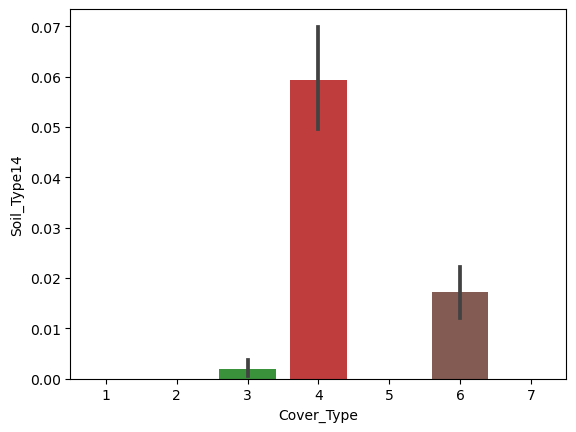

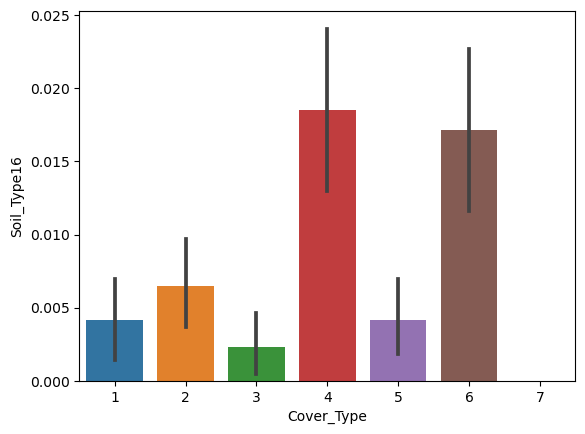

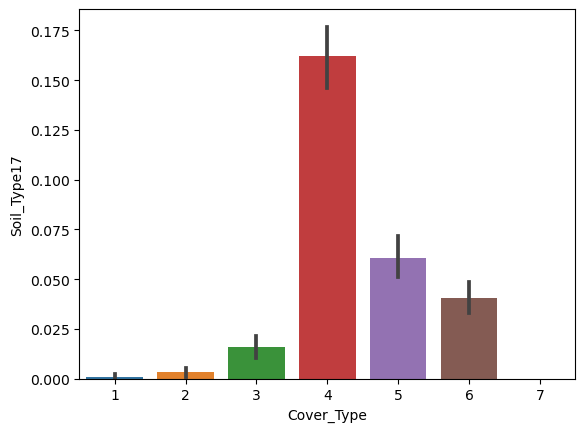

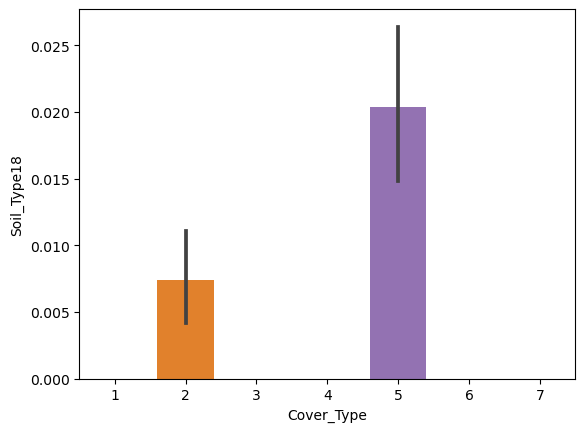

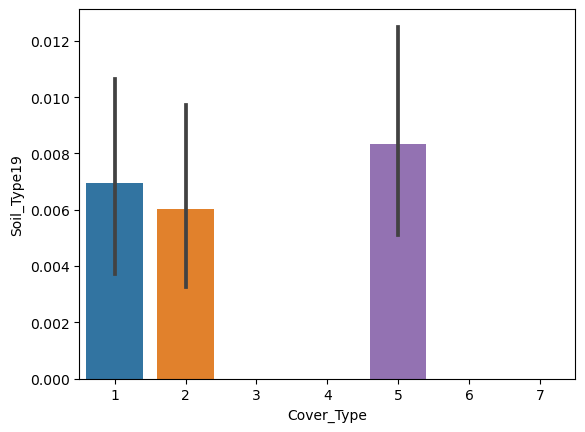

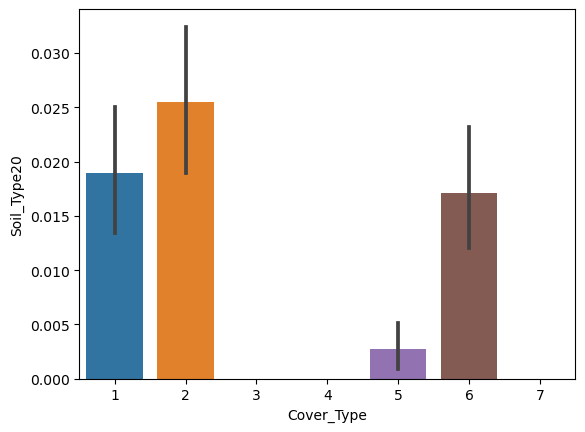

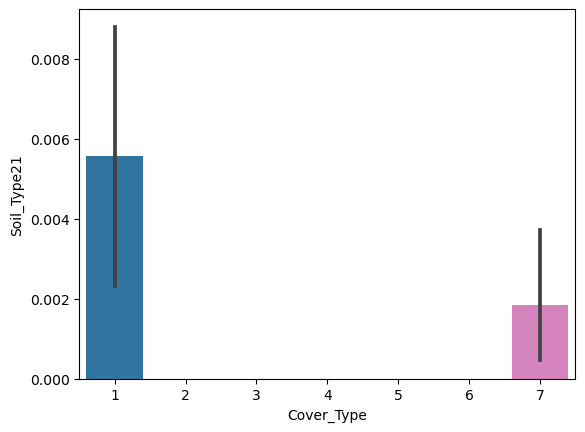

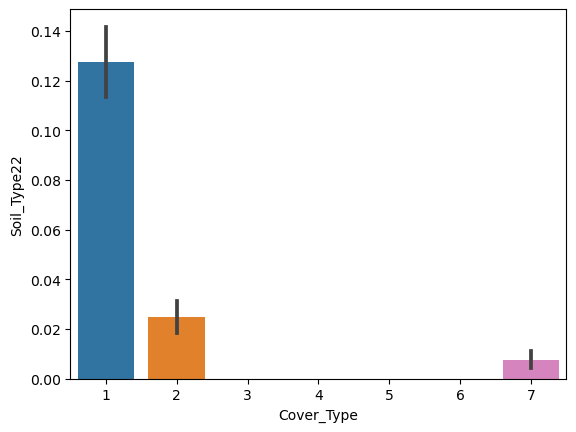

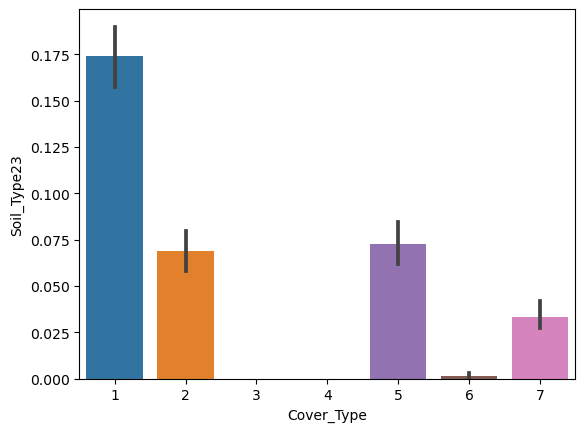

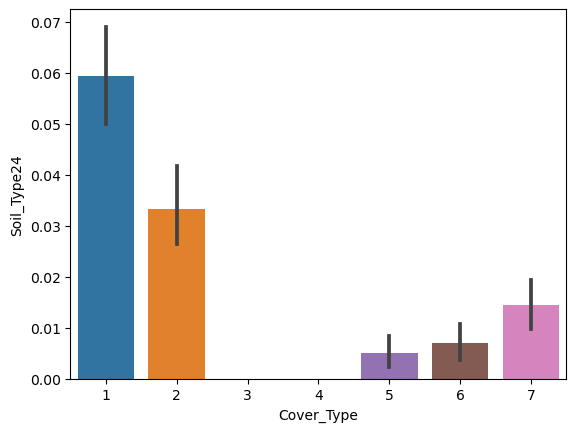

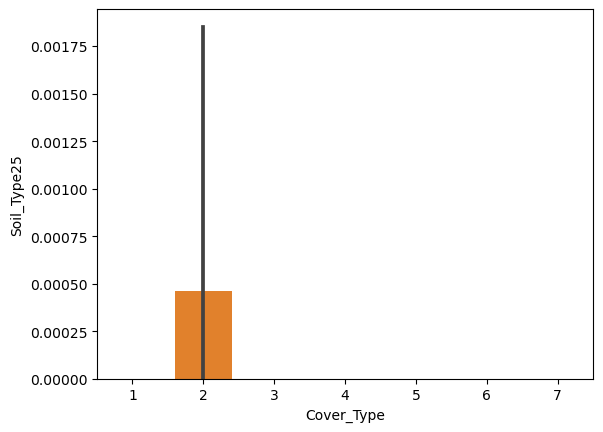

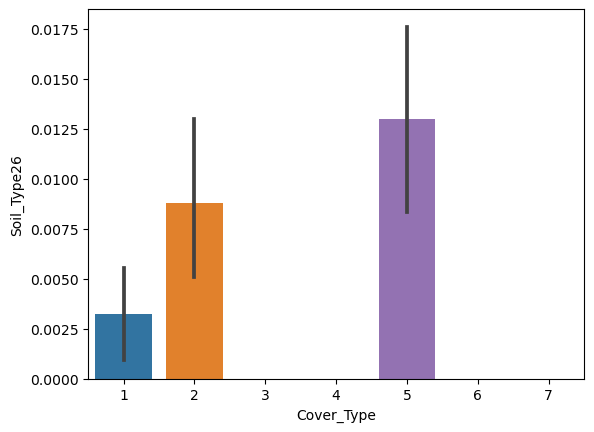

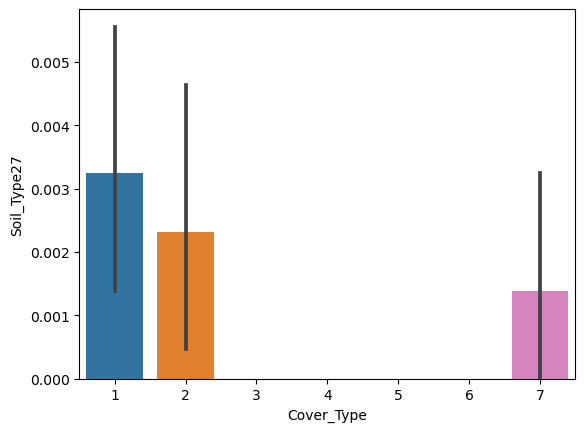

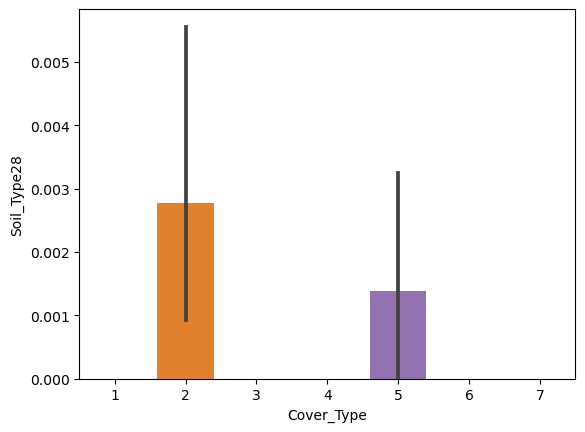

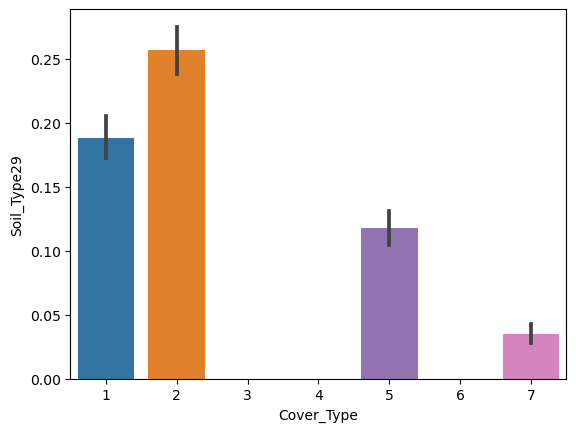

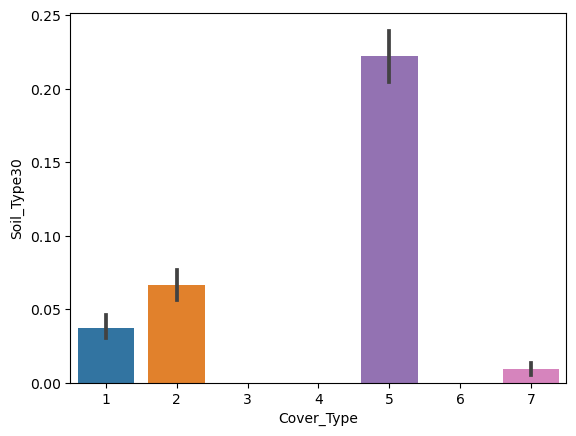

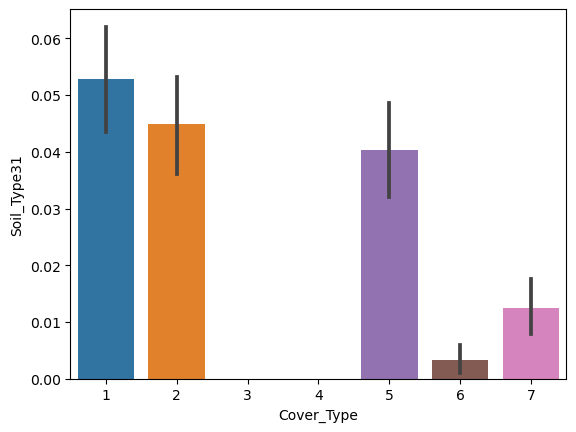

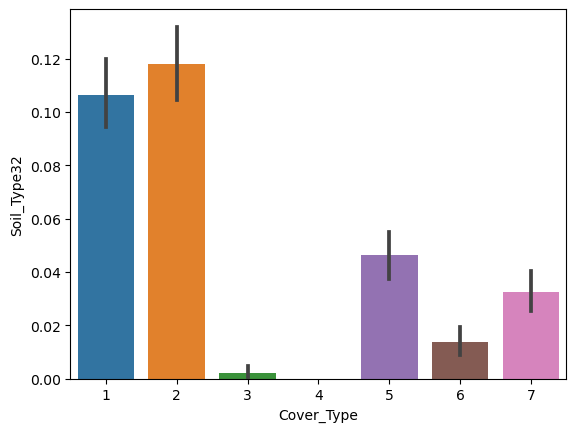

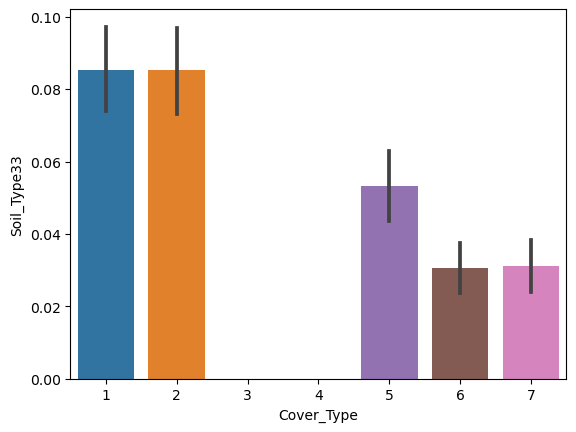

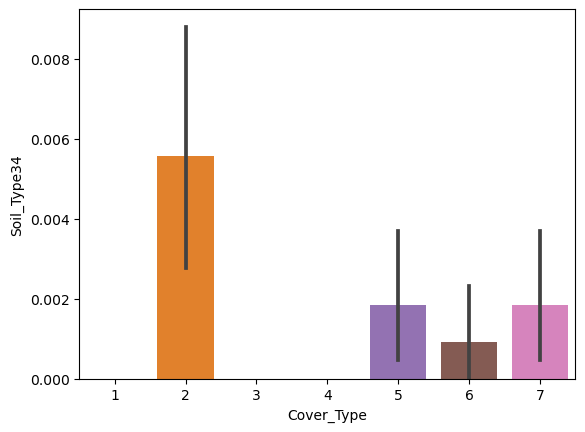

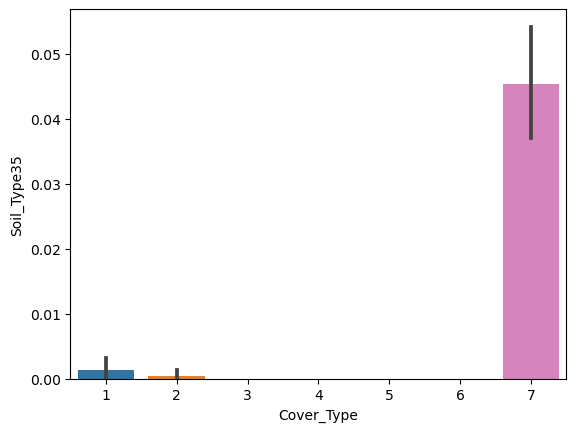

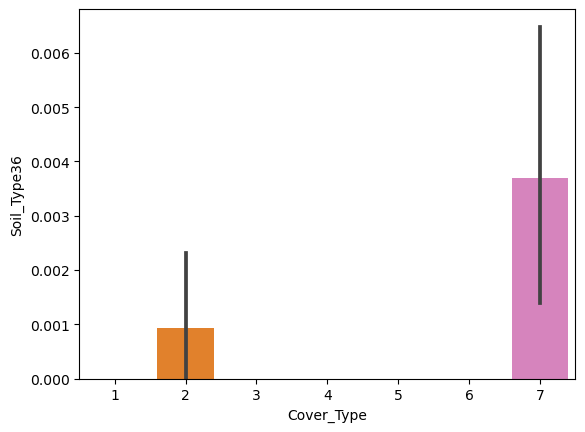

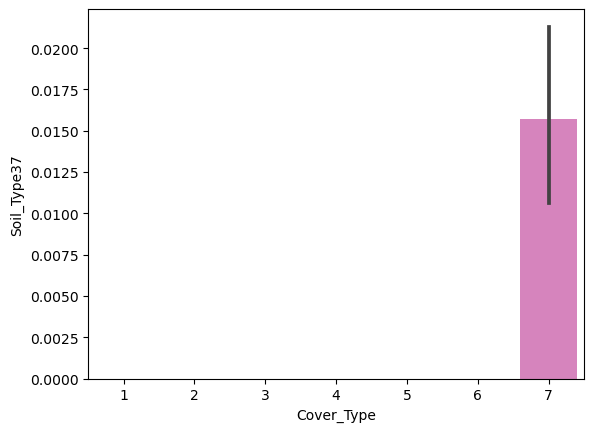

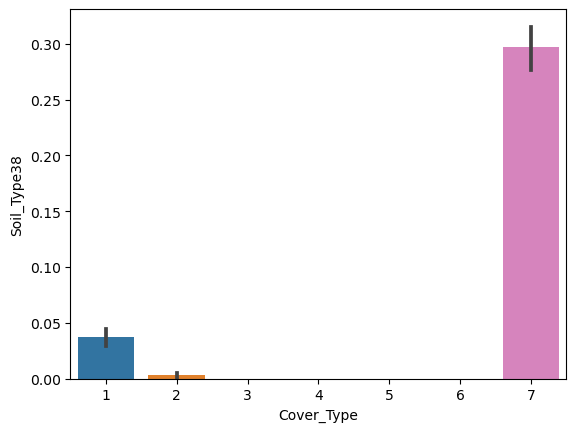

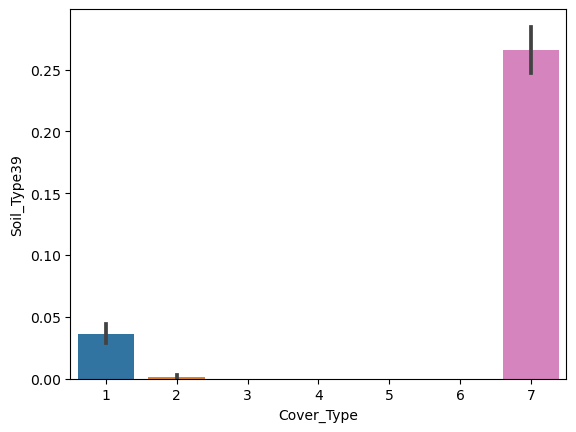

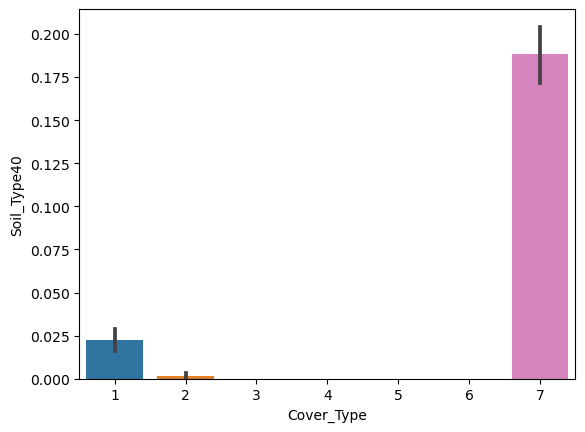

In [24]:
for column in train_df.columns[11:-1]:
    sns.barplot(x=train_df["Cover_Type"],y=train_df[column])
    plt.show()

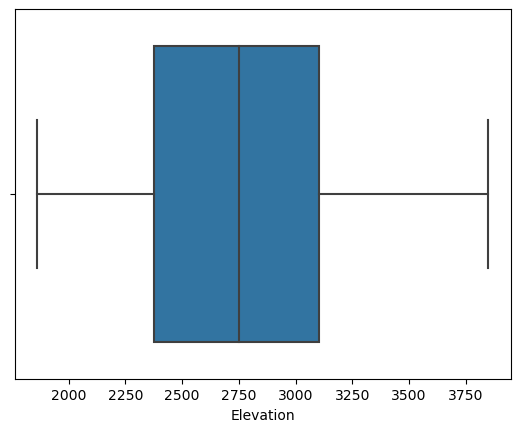

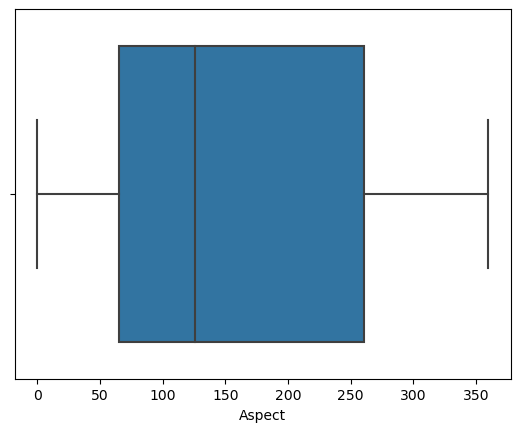

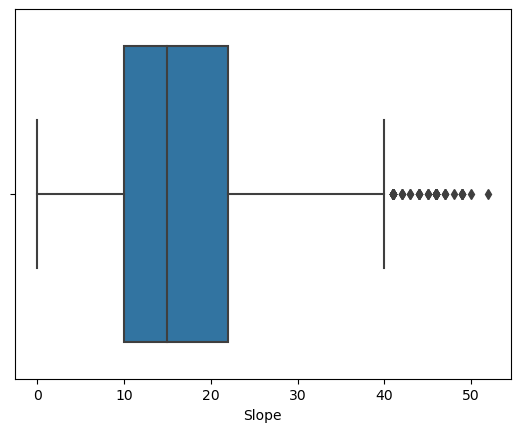

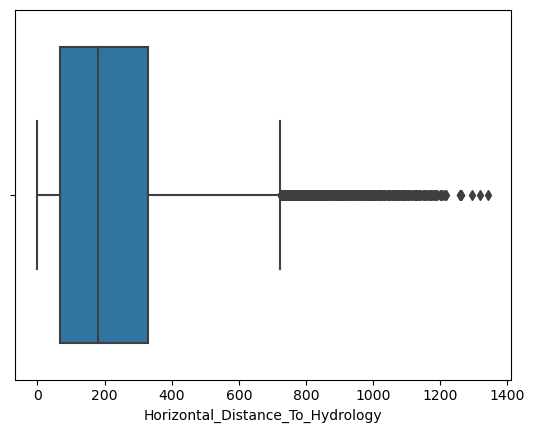

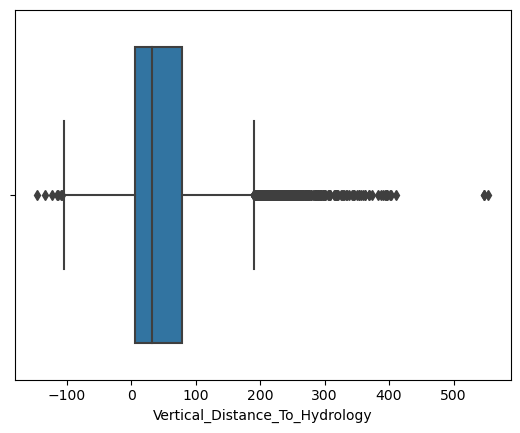

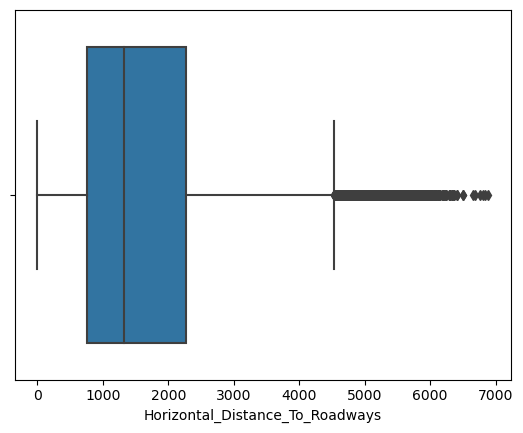

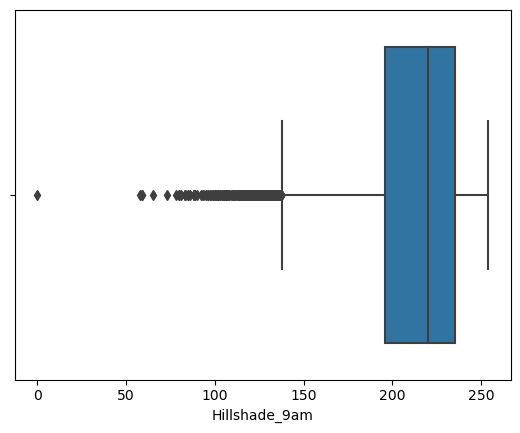

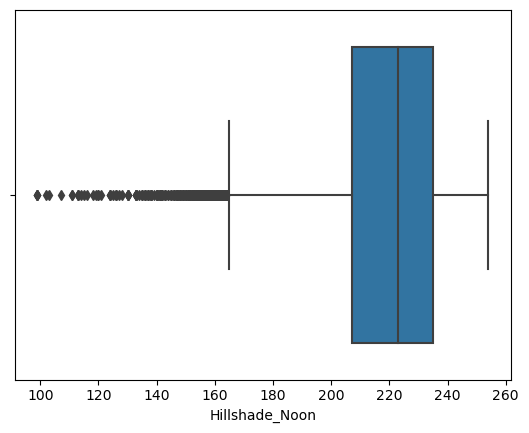

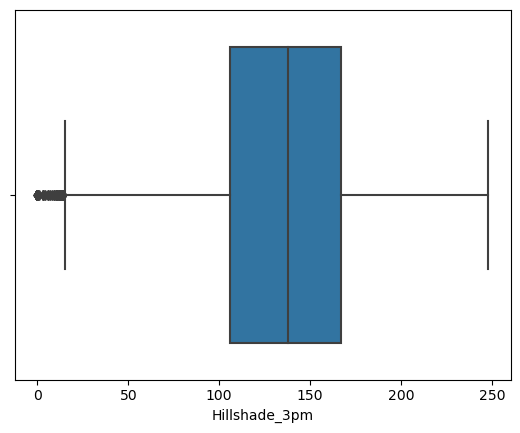

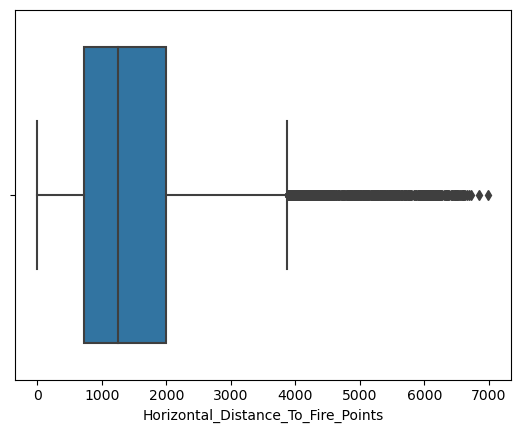

In [25]:
for column in df_hist.columns:
    sns.boxplot(x = train_df[column])
    plt.show()

In [26]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
num_col = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
for i in num_col:
    
    Q1,Q3=train_df[i].quantile(0.25),train_df[i].quantile(0.75)
# identify outliers
    
    IQR=Q3-Q1
    
    lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
    print(i,': \n')
# identify outliers
    outliers = [x for x in train_df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in train_df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)
    
print("-"*50)    
    
Outliers=pd.DataFrame({'Feature':list(num_col),'% Of Outliers':out_per})
Outliers

Elevation : 

Identified outliers: 0
Non-outlier observations: 15120
Percent of outlers: 0.0 

Aspect : 

Identified outliers: 0
Non-outlier observations: 15120
Percent of outlers: 0.0 

Slope : 

Identified outliers: 57
Non-outlier observations: 15063
Percent of outlers: 0.376984126984127 

Horizontal_Distance_To_Hydrology : 

Identified outliers: 512
Non-outlier observations: 14608
Percent of outlers: 3.3862433862433865 

Vertical_Distance_To_Hydrology : 

Identified outliers: 586
Non-outlier observations: 14534
Percent of outlers: 3.875661375661376 

Horizontal_Distance_To_Roadways : 

Identified outliers: 830
Non-outlier observations: 14290
Percent of outlers: 5.489417989417989 

Hillshade_9am : 

Identified outliers: 408
Non-outlier observations: 14712
Percent of outlers: 2.6984126984126986 

Hillshade_Noon : 

Identified outliers: 393
Non-outlier observations: 14727
Percent of outlers: 2.5992063492063493 

Hillshade_3pm : 

Identified outliers: 124
Non-outlier observations: 14996

Feature  % Of Outliers
0                           Elevation       0.000000
1                              Aspect       0.000000
2                               Slope       0.376984
3    Horizontal_Distance_To_Hydrology       3.386243
4      Vertical_Distance_To_Hydrology       3.875661
5     Horizontal_Distance_To_Roadways       5.489418
6                       Hillshade_9am       2.698413
7                      Hillshade_Noon       2.599206
8                       Hillshade_3pm       0.820106
9  Horizontal_Distance_To_Fire_Points       4.265873

In [27]:
for column in df_hist.columns:
    q75,q25 = np.percentile(train_df.loc[:,column],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[column] < min,column] = np.nan
    train_df.loc[train_df[column] > max,column] = np.nan

In [28]:
train_df.isna().sum()[:11]

Id                                      0
Elevation                               0
Aspect                                  0
Slope                                  57
Horizontal_Distance_To_Hydrology      512
Vertical_Distance_To_Hydrology        586
Horizontal_Distance_To_Roadways       830
Hillshade_9am                         408
Hillshade_Noon                        393
Hillshade_3pm                         124
Horizontal_Distance_To_Fire_Points    645
dtype: int64

In [29]:
train_df.dropna(inplace=True)

In [30]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
num_col = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
for i in num_col:
    
    Q1,Q3=train_df[i].quantile(0.25),train_df[i].quantile(0.75)
# identify outliers
    
    IQR=Q3-Q1
    
    lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
    print(i,': \n')
# identify outliers
    outliers = [x for x in train_df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in train_df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)
    
print("-"*50)    
    
Outliers=pd.DataFrame({'Feature':list(num_col),'% Of Outliers':out_per})
Outliers

Elevation : 

Identified outliers: 0
Non-outlier observations: 12259
Percent of outlers: 0.0 

Aspect : 

Identified outliers: 0
Non-outlier observations: 12259
Percent of outlers: 0.0 

Slope : 

Identified outliers: 16
Non-outlier observations: 12243
Percent of outlers: 0.1305163553307774 

Horizontal_Distance_To_Hydrology : 

Identified outliers: 94
Non-outlier observations: 12165
Percent of outlers: 0.7667835875683171 

Vertical_Distance_To_Hydrology : 

Identified outliers: 186
Non-outlier observations: 12073
Percent of outlers: 1.5172526307202872 

Horizontal_Distance_To_Roadways : 

Identified outliers: 381
Non-outlier observations: 11878
Percent of outlers: 3.1079207113141365 

Hillshade_9am : 

Identified outliers: 63
Non-outlier observations: 12196
Percent of outlers: 0.5139081491149359 

Hillshade_Noon : 

Identified outliers: 67
Non-outlier observations: 12192
Percent of outlers: 0.5465372379476303 

Hillshade_3pm : 

Identified outliers: 0
Non-outlier observations: 12259
P

Feature  % Of Outliers
0                           Elevation       0.000000
1                              Aspect       0.000000
2                               Slope       0.130516
3    Horizontal_Distance_To_Hydrology       0.766784
4      Vertical_Distance_To_Hydrology       1.517253
5     Horizontal_Distance_To_Roadways       3.107921
6                       Hillshade_9am       0.513908
7                      Hillshade_Noon       0.546537
8                       Hillshade_3pm       0.000000
9  Horizontal_Distance_To_Fire_Points       1.272534

In [31]:
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
184  185     3221.0   292.0    3.0                             424.0   
188  189     2518.0   107.0    5.0                             360.0   
193  194     3182.0   116.0    7.0                             579.0   
195  196     2515.0    90.0    9.0                             313.0   
201  202     3231.0    45.0    4.0                             648.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
184                            49.0                           4401.0   
188                            39.0                            553.0   
193                            10.0                           4425.0   
195                            39.0                            511.0   
201                            59.0                           4173.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
184          212.0           238.0          165.0   
188          229.0           234.0          139.0   
193          233.0           233.0          133.0   
195          233.0           227.0          125.0   
201          221.0           231.0          147.0   

     Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
184                              1710.0                 1                 0   
188                              3522.0                 1                 0   
193                              1854.0                 1                 0   
195                              3451.0                 1                 0   
201                              1921.0                 1                 0   

     Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
184                 0                 0           0           0           0   
188                 0                 0           0           0           0   
193                 0                 0           0           0           0   
195                 0                 0           0           0           0   
201                 0                 0           0           0           0   

     Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type8  Soil_Type9  Soil_Type10  \
184           0           0           0           0           0            0   
188           0           0           0           0           0            0   
193           0           0           0           0           0            0   
195           0           0           0           0           0            0   
201           0           0           0           0           0            0   

     Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type16  \
184            0            0            0            0            0   
188            0            0            0            0            0   
193            0            0            0            0            0   
195            0            0            0            0            0   
201            0            0            0            0            0   

     Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  \
184            0            0            0            0            0   
188            0            1            0            0            0   
193            0            0            0            0            0   
195            0            1            0            0            0   
201            0            0            0            0            0   

     Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  \
184            0            0            0            0            0   
188            0            0            0            0            0   
193            0            0            0            0            0   
195            0            0            0            0            0   
201            0            0            0            0            0   

     Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  \
184            0   

In [32]:
scaler = MinMaxScaler()
for column in df_hist.columns:
    train_df[column] = scaler.fit_transform(train_df[[column]])

In [33]:
X = train_df.drop(["Id","Cover_Type"],axis=1)
Y = train_df["Cover_Type"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [36]:
# Linear Classification (Logistic Regression)
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_accuracy = lr_classifier.score(X_test, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)

# Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_accuracy = svm_classifier.score(X_test, y_test)
print("SVM Accuracy:", svm_accuracy)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_accuracy = knn_classifier.score(X_test, y_test)
print("KNN Accuracy:", knn_accuracy)

# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_accuracy = dt_classifier.score(X_test, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

# Multi-Layer Perceptron (MLP)
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train, y_train)
mlp_accuracy = mlp_classifier.score(X_test, y_test)
print("MLP Accuracy:", mlp_accuracy)

# LightGBM
lgbm_classifier = LGBMClassifier()
lgbm_classifier.fit(X_train, y_train)
lgbm_accuracy = lgbm_classifier.score(X_test, y_test)
print("LightGBM Accuracy:", lgbm_accuracy)

Logistic Regression Accuracy: 0.6750951604132681
SVM Accuracy: 0.7194127243066885
KNN Accuracy: 0.768352365415987
Decision Tree Accuracy: 0.7816748232735182
MLP Accuracy: 0.7879282218597063
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1931
[LightGBM] [Info] Number of data points in the train set: 8581, number of used features: 43
[LightGBM] [Info] Start training from score -2.060624
[LightGBM] [Info] Start training from score -2.092225
[LightGBM] [Info] Start training from score -1.916853
[LightGBM] [Info] Start training from score -1.783519
[LightGBM] [Info] Start training from score -1.904254
[LightGBM] [Info] Start training from score -1.858374
[LightGBM] [Info] Start training from score -2.046092
LightGBM Accuracy: 0.8412180532898315
